In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   MaxAbsScaler,
                                   PolynomialFeatures)
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso

1. **Data exploration and preparation**

In [ ]:
df = pd.read_csv("/content/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.shape

(2938, 22)

In [ ]:
df.describe(include="all")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
df.fillna(method="ffill", inplace=True)

<ipython-input-7-f1ce73c3d712>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


Converting ```object``` datatypes to numerical

In [ ]:
le = LabelEncoder()
df_num = df.copy()

df_num["Country"] = le.fit_transform(df["Country"])
df_num["Status"] = le.fit_transform(df["Status"])

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int64  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df_num.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


As for further examination, checked whether the target feature ```Life expectancy``` is normally distributed.

Text(0.5, 1.0, 'Target feature distribution')

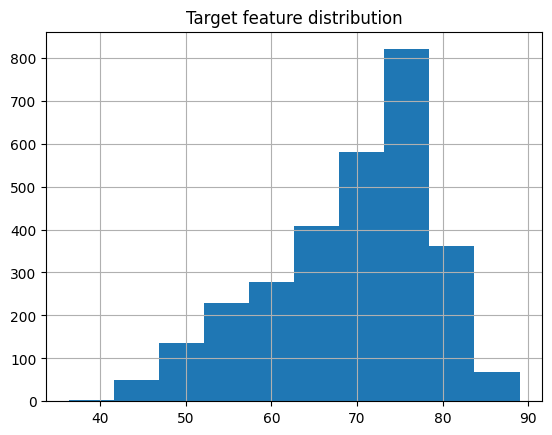

In [ ]:
df_num["Life expectancy "].hist()
plt.title("Target feature distribution")

In [ ]:
target = df_num["Life expectancy "]
normaltest(target.values)

NormaltestResult(statistic=177.33620410175092, pvalue=3.1040775189334384e-39)

As the target variable does not appear to be normally distributed three different transformation techniques will be applied namely:

- log,

- square root,

- boxcox.

NormaltestResult(statistic=331.50266735668373, pvalue=1.0354053755454299e-72)

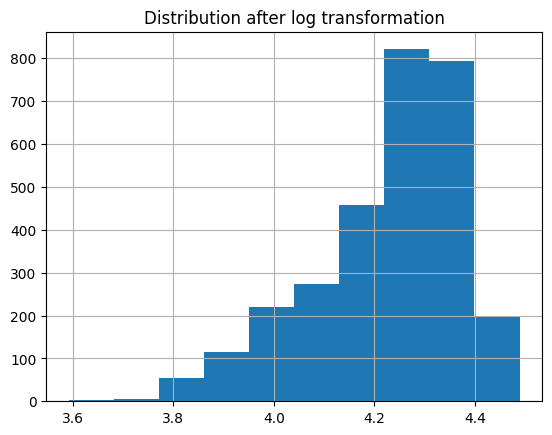

In [ ]:
plt.hist(np.log(target))
plt.grid(True)
plt.title("Distribution after log transformation")
normaltest(np.log(target))

NormaltestResult(statistic=240.082434121537, pvalue=7.358034665336535e-53)

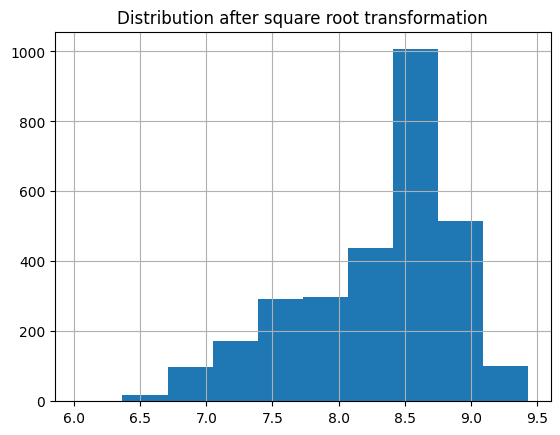

In [ ]:
plt.hist(np.sqrt(target))
plt.grid(True)
plt.title("Distribution after square root transformation")
normaltest(np.sqrt(target))

NormaltestResult(statistic=80.0253258744376, pvalue=4.194896790656272e-18)

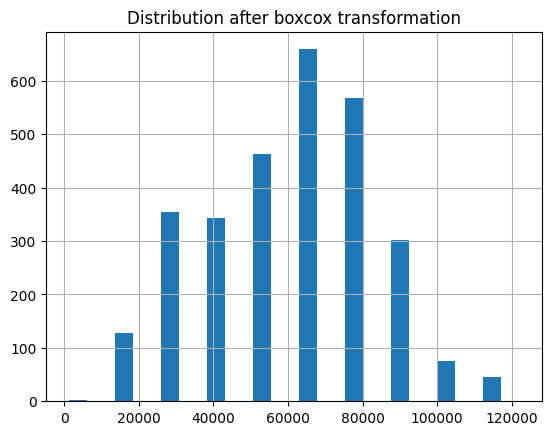

In [ ]:
plt.hist(boxcox(target))
plt.grid(True)
plt.title("Distribution after boxcox transformation")
normaltest(boxcox(target)[0])

It seems that none of the transformation technniques have sufficient influence on target data, therefore for further analysis unchanged data will be taken.

**Scaling**

Three scaling techniques will be compared:

- StandardScaler,

- MinMaxScaler,

- MaxAbsScaler.

Their performance will be assessed based on r2_score

In [ ]:
X = df_num.drop("Life expectancy ", axis=1)
y = df_num["Life expectancy "]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

In [ ]:
class lin_reg:

    def __init__(self, scaler, reg=None, degree=1, alpha=1, lr=LinearRegression()):
        self.scaler = scaler
        self.lr = lr
        self.reg = reg
        self.degree = degree
        self.alpha = alpha

    def perform_lr(self, X_train, y_train, X_test):
        polynomial = PolynomialFeatures(degree=self.degree, include_bias=False)
        if self.reg == "lasso":
            model = Lasso(alpha=self.alpha)
        elif self.reg == "ridge":
            model = Ridge(alpha=self.alpha)
        else:
            model = self.lr
        pipe = Pipeline([("scaler", self.scaler),
                        ("polynomial", polynomial),
                        ("regression", model)])
        pipe.fit(X_train, y_train)
        return pipe.predict(X_test)

    @staticmethod
    def evaluate(y_test, y_pred):
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return mse, r2

In [ ]:
scalers = [StandardScaler(),
          MinMaxScaler(),
          MaxAbsScaler()]
regs = ["lasso", "ridge"]
degrees = [1, 2, 3]
alphas = [.01, .1, 1, 10]
evals = {}

**Scalers**

In [ ]:
models = [lin_reg(scaler=scaler) for scaler in scalers]
preds = {model.scaler.__class__.__name__: model.perform_lr(X_train, y_train, X_test) for model in models}
evals_sc = {model.scaler.__class__.__name__: model.evaluate(y_test, preds[model.scaler.__class__.__name__]) for model in models}
print(evals_sc)

{'StandardScaler': (17.886983956038968, 0.8018505304833281), 'MinMaxScaler': (17.886983956038936, 0.8018505304833284), 'MaxAbsScaler': (17.88698395603893, 0.8018505304833285)}


In [ ]:
scaler = StandardScaler()

In [ ]:
models = [lin_reg(scaler=scaler, degree=degree) for degree in degrees]
preds = {model.degree: model.perform_lr(X_train, y_train, X_test) for model in models}
evals_deg = {model.degree: model.evaluate(y_test, preds[model.degree]) for model in models}
print(evals_deg)

{1: (17.886983956038968, 0.8018505304833281), 2: (9.90642425875104, 0.89025803810732), 3: (13949788.615336515, -154532.77834922334)}


In [ ]:
for reg in regs:
    evals_al = []
    models = [lin_reg(scaler=scaler, reg=reg, degree=2, alpha=alpha) for alpha in alphas]
    preds = {model.alpha: model.perform_lr(X_train, y_train, X_test) for model in models}
    evals_al.append({model.alpha: model.evaluate(y_test, preds[model.alpha]) for model in models})
    evals[reg] = evals_al
print(evals)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.610e+02, tolerance: 1.875e+01
  model = cd_fast.enet_coordinate_descent(


{'lasso': [{0.01: (8.492370861577712, 0.9059227209407579), 0.1: (10.176852094951373, 0.8872622769204516), 1: (20.842587739839175, 0.7691087712632807), 10: (84.37496055452172, 0.06530616254485921)}], 'ridge': [{0.01: (9.62726124818904, 0.8933505663159597), 0.1: (9.235837378315347, 0.897686704390565), 1: (8.94254513967097, 0.9009357541825015), 10: (8.880996067394632, 0.9016175860693514)}]}


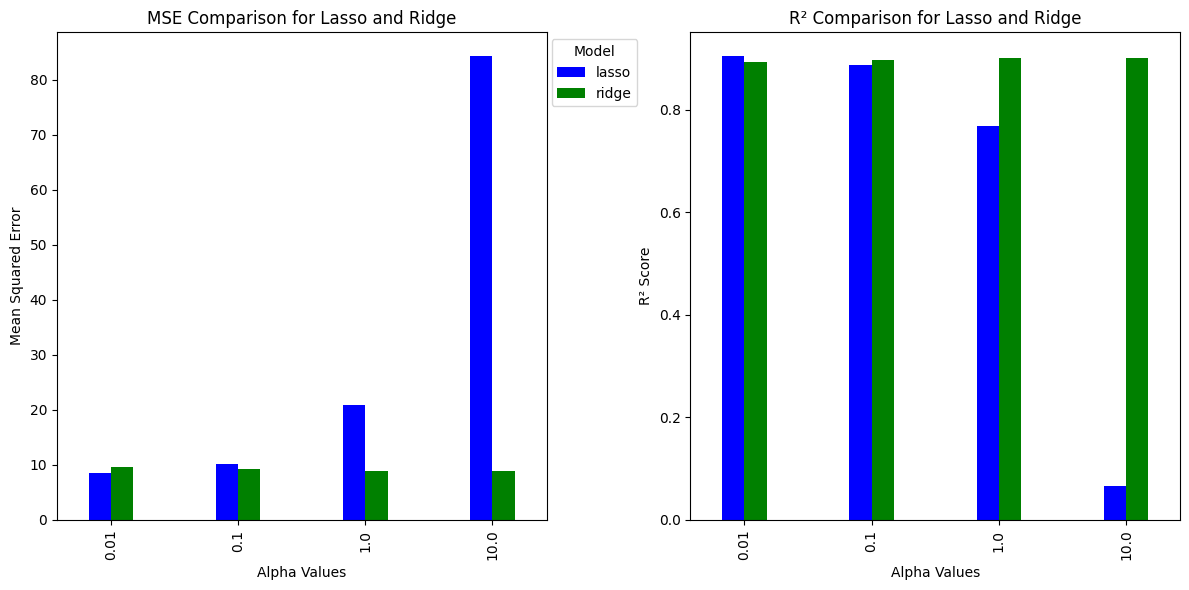

In [ ]:
records = []

# Iterate through the data dictionary to extract alphas, MSE, and R² values
for reg_type, values in evals.items():
    for value in values:
        for alpha, metrics in value.items():
            mse, r2 = metrics
            records.append({
                'reg_type': reg_type,
                'alpha': alpha,
                'MSE': mse,
                'R²': r2
            })

df = pd.DataFrame(records)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

bar_width = 0.35
index = np.arange(len(df['alpha'].unique()))


df_mse = df.pivot(index='alpha', columns='reg_type', values='MSE')

df_mse.plot(kind='bar', stacked=False, width=bar_width, ax=ax1, color=['blue', 'green'])
ax1.set_title('MSE Comparison for Lasso and Ridge')
ax1.set_ylabel('Mean Squared Error')
ax1.set_xlabel('Alpha Values')
ax1.set_xticklabels([str(alpha) for alpha in df['alpha'].unique()])
ax1.legend(title='Model', loc='upper right', fontsize=10, bbox_to_anchor=(1.2, 1))

df_r2 = df.pivot(index='alpha', columns='reg_type', values='R²')

df_r2.plot(kind='bar', stacked=False, width=bar_width, ax=ax2, color=['blue', 'green'])
ax2.set_title('R² Comparison for Lasso and Ridge')
ax2.set_ylabel('R² Score')
ax2.set_xlabel('Alpha Values')
ax2.set_xticklabels([str(alpha) for alpha in df['alpha'].unique()])
ax2.get_legend().remove()
plt.tight_layout()

plt.show()